In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
# converting species to integer categorical values: Iris setosa: 0, Iris versicolor: 1, Iris virginica: 2

# convert the column to a categorical column
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
df = df.drop('Id', axis=1)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df.drop('Species', axis=1)
y = df['Species']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30)

In [11]:
y_train

60     1
94     1
17     0
68     1
63     1
      ..
144    2
64     1
123    2
10     0
91     1
Name: Species, Length: 105, dtype: int8

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
predictions = model.predict(X_test)
predictions

array([0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2,
       2], dtype=int8)

In [14]:
print(y_test, predictions)

42     0
101    2
120    2
37     0
77     1
8      0
4      0
21     0
136    2
103    2
5      0
44     0
26     0
20     0
59     1
92     1
1      0
43     0
46     0
58     1
148    2
73     1
51     1
56     1
118    2
62     1
113    2
39     0
67     1
82     1
78     1
88     1
98     1
106    2
65     1
138    2
15     0
97     1
30     0
23     0
89     1
132    2
102    2
116    2
140    2
Name: Species, dtype: int8 [0 2 2 0 2 0 0 0 2 2 0 0 0 0 1 1 0 0 0 1 2 1 1 1 2 1 2 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 2 2 2 2]


In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9333333333333333

In [16]:
from sklearn.metrics import confusion_matrix
y_test_np = np.array(y_test)
y_predicted_np = np.array(predictions)

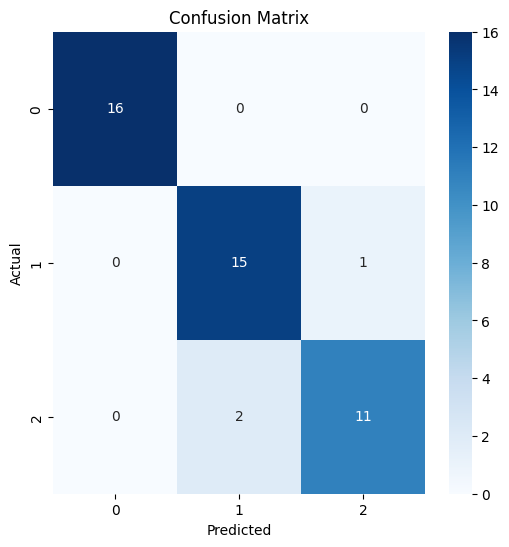

In [17]:
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()